# Web开发前置知识

### 服务器相关概念
---

1. 软件概念的服务器和硬件概念的服务器

软件层面: 比如学习数据库的时候，电脑装了MySQL服务端，那么此时你的电脑就是一个MySQL服务器。然后你又装了SVN服务端，那么此时你的电脑既是MySQL服务器，又是SVN服务器, Tomcat服务器同理。

硬件层面： 服务器本质上也是一台电脑，就一大铁箱。

2. Web server and Web container

其实，Tomcat服务器 = Web server + Servlet/JSP container（Web container）。

> A web container (also known as a servlet container) is the component of a web server that interacts with Jakarta Servlets.

Web server的作用是接收客户端的requests，给客户端作出响应。但是很明显，服务器不止静态资源，所以客户端发起请求后，如果是动态资源，Web服务器不可能直接把它响应回去（比如JSP），因为浏览器只认识静态资源。所以对于JavaWeb程序而言还需要把动态资源(JSP)转换成静态资源(HTML), 而JSP/Servlet container的基本功能就是干这个的。

JavaWeb工程师需要使用Web server和JSP/Servlet container，而通常这两者会集于一身，比如Tomcat。

> Apache Tomcat, one of the most popular web server and Servlet container for Java code.

### 1. What is MVC?
--- 
Model–view–controller (usually known as MVC) is a software design pattern commonly used for developing user interfaces that divide the related program logic into three interconnected elements.
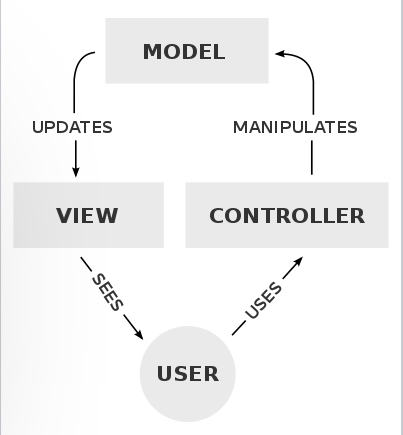

+ The model is responsible for managing the data of the application. It receives user input from the controller.


+ The view renders presentation of the model in a particular format.


+ The controller responds to the user input and performs interactions on the data model objects. The controller receives the input, optionally validates it and then passes the input to the model.

### 2. What is JSP?
--- 
A JSP is a text document which contains two types of text: static data and dynamic data. The `static data` can be expressed in any text-based format (like HTML, XML, SVG and WML), and the `dynamic content` can be expressed by JSP elements.

1. Architecturally, JSP may be viewed as a high-level abstraction of Java servlets. `JSPs are translated into servlets at runtime, therefore JSP is a Servlet`; each JSP servlet is cached and re-used until the original JSP is modified. 


2. Jakarta Server Pages can be used independently or as the view component of a server-side model–view–controller design, normally with JavaBeans as the model and Java servlets (or a framework such as Apache Struts) as the controller. This type's architecture: 

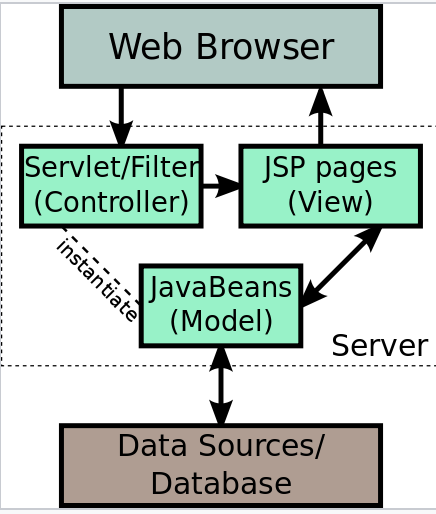


JSP allows Java code and certain predefined actions to be interleaved with static web markup content, such as HTML. 

The `resulting page is compiled and executed on the server` to deliver a document. The compiled pages, as well as any dependent Java libraries, contain Java bytecode rather than machine code. `Like any other .jar or Java program, code must be executed within a Java virtual machine (JVM)`. 


### 3. What is Servlet?
**Reference：**    
[1]HttpServlet class with example：https://beginnersbook.com/2013/05/http-servlet/ 

---

A servlet is a Java class which is used to `extend the capabilities of servers`. 

#### 3.1. How Http Servlet works?
As you can see in the diagram below that client (user’s browser) make requests. These requests can be of any type, for example – Get Request, Post Request etc. Server dispatches these requests to the servlet’s service() method, this method dispatches these requests to the correct handler for example if it receives Get requests it dispatches it to the doGet() method.

![5.png](attachment:5.png)

#### 3.2. Hierarchy of Http Servlet
```java
java.lang.Object
	|_extended byjavax.servlet.GenericServlet
         	 |_extended byjavax.servlet.http.HttpServlet
```
You should always use HttpServlet instead of the GenericServlet. HttpServlet is easier to work with, and has more methods to work with than GenericServlet.

#### 3.3. Http Servlet example
##### 3.3.1 index.html
We are creating an html file that would call the servlet once we click on the link on web page. Create this file in WebContent folder. The path of the file should look like this:`src/main/webapp/index.jsp`

```html
<%@ page contentType="text/html; charset=UTF-8" pageEncoding="UTF-8" %>
index<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>Http Servlet Demo</title>
</head>
<body>
    <a href="href_welcome">Click to call Servlet</a>
</body>
</html>
```

##### 3.3.2 ExampleHttpServlet.java
Now, we are creating a Http Servlet by extending HttpServlet class. The file path should look like this:`src/main/java/ExampleHttpServlet.java` 

```java
import java.io.*;
import javax.servlet.*;
import javax.servlet.http.*;
// Creating Http Servlet by Extending HttpServlet class
public class ExampleHttpServlet extends HttpServlet
{
    private String mymsg;
    public void init() throws ServletException {
        mymsg = "Http Servlet Demo";
    }
    
    public void doGet(HttpServletRequest request,HttpServletResponse response) throws ServletException, IOException {
        // Setting up the content type of web page
        response.setContentType("text/html");
        // Writing the message on the web page
        PrintWriter out = response.getWriter();
        out.println("<h1>" + mymsg + "</h1>");
        out.println("<p>" + "Hello Friends!" + "</p>");
    }
    
    public void destroy() {
        // Leaving empty. Use this if you want to perform
        //something at the end of Servlet life cycle.
    }
}
```

##### 3.3.3 web.xml
This file can be found at this path`src/main/webapp/WEB-INF/web.xml`. In this file we will map the Servlet with the specific URL( < a href="href_welcome" >)

```html
<?xml version="1.0" encoding="UTF-8"?>
<web-app xmlns="http://xmlns.jcp.org/xml/ns/javaee"
         xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
         xsi:schemaLocation="http://xmlns.jcp.org/xml/ns/javaee http://xmlns.jcp.org/xml/ns/javaee/web-app_4_0.xsd"
         version="4.0">
    <welcome-file-list>
        <welcome-file>/index.jsp</welcome-file>
    </welcome-file-list>

    <!--Since we are calling welcome page upon clicking the link on index.jsp page
     so we are mapping the welcome page to the Servlet class we created above 
    and map the Servlet with the specific URL(<a href="href_welcome">...)-->
    <servlet>
        <servlet-name>myHttpServlet</servlet-name>
        <servlet-class>ExampleHttpServlet</servlet-class>
    </servlet>
    <servlet-mapping>
        <servlet-name>myHttpServlet</servlet-name>
        <url-pattern>/href_welcome</url-pattern>
    </servlet-mapping>
</web-app>
```

![6.png](attachment:6.png)

![7.png](attachment:7.png)

![8.png](attachment:8.png)


> 1. protected void doGet(HttpServletRequest req, HttpServletResponse resp): This method is called by servlet service method to handle the HTTP GET request from client. When overriding this method, read the request data, write the response headers, get the response’s writer or output stream object, and finally, write the response data.

> 2. protected void doPost(HttpServletRequest req, HttpServletResponse resp): This method is called by servlet service method to handle the POST request from client. The HTTP POST method allows the client to send data of unlimited length to the Web server a single time and is useful when posting information to the server. Unlike, doGet where we get information from the sever this method is used when we are transferring information from client to the server.



### 4. Difference between Servlet and JSP
--- 
+ Servlet is a java code, but JSP is a html based code.

+ Servlet plays a controller role in MVC approach(Controller), while JSP is the view in MVC approach for showing output(View).

+ Servlet is faster than JSP by contrast, JSP is slower than Servlet because the first step in JSP lifecycle is the translation of JSP to java code and then compile. 

+ Servlet can accept all protocol requests.	JSP only accept http requests.

### 5. JSP与AJAX+HTML
---
其实请求、响应这么一来一回，无非要的就两样东西：数据+HTML骨架。如果把服务器端比作淘宝卖家，客户端（浏览器）比作买家，而数据和HTML则是一件商品的两个重要组成部件。那么我们很自然地能够想到，其实运输方式至少可以有两种：

1. 卖家组装好商品后再发货（JSP）

2. 卖家把部件拆开，运到之后买家自己组装（AJAX+HTML）

JSP是服务器端的，它的局限性在于数据必须在返回给客户端之前就“装载”完毕。不然HTML都已经发出去了，你就没办法跑到浏览器里把数据给它安上。

而有了AJAX，就可以实现零件发送、目的地组装了。

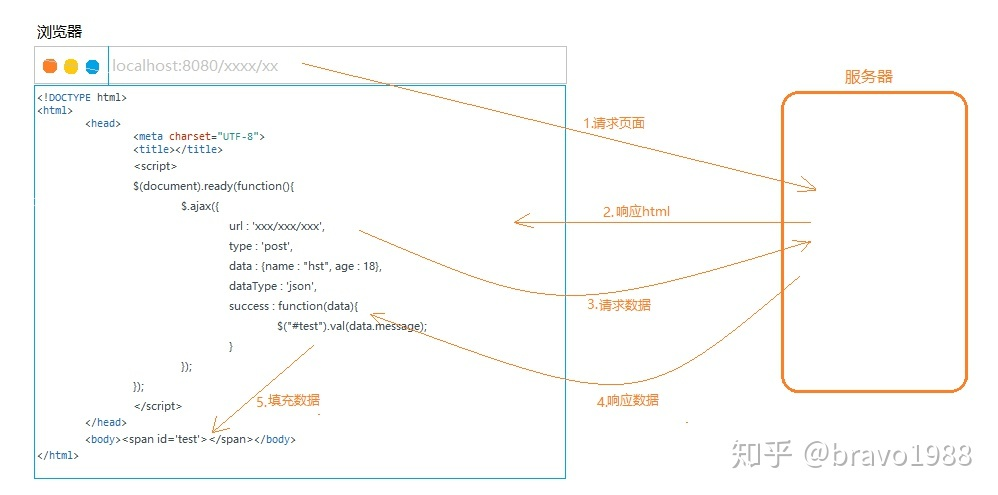

虽然我们在浏览器地址栏输入localhost:8080/xxx/xxx.jsp，就显示出了当前页面，但那不是JSP页面，而是HTML页面。服务器并没有直接把JSP文件从服务端扔到客户端！JSP是Java Server Page，是服务器端的东西。服务器的东西永远不可能直接在浏览器运行。浏览器只能接受静态页面。

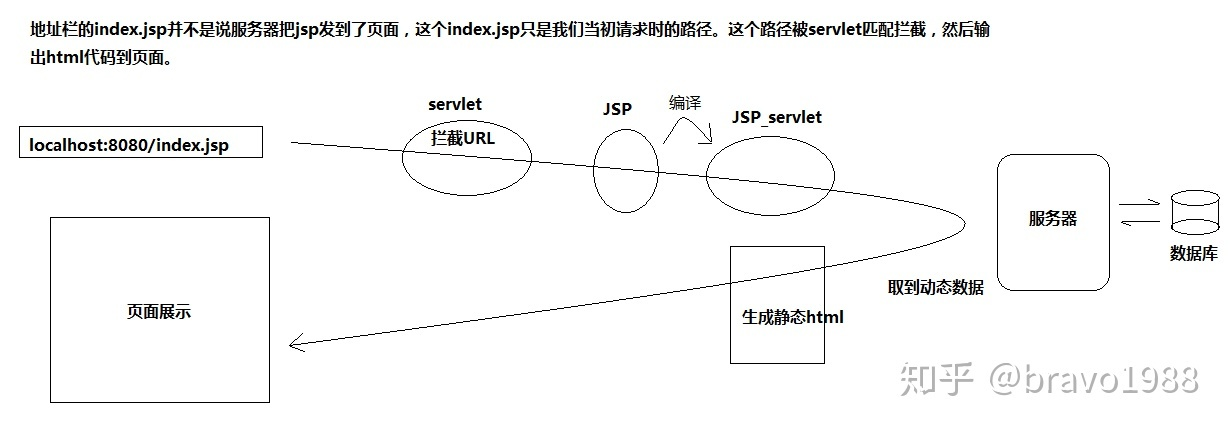
> 客户端之所以能显示页面，是因为JSP已经把数据和HTML片段拼凑成完整的静态页面返回给客户端